In [ ]:
import pandas as pd
import os

os.chdir("/home/jpell")

df = pd.read_csv("test.csv")

# df.plot()

df.head()

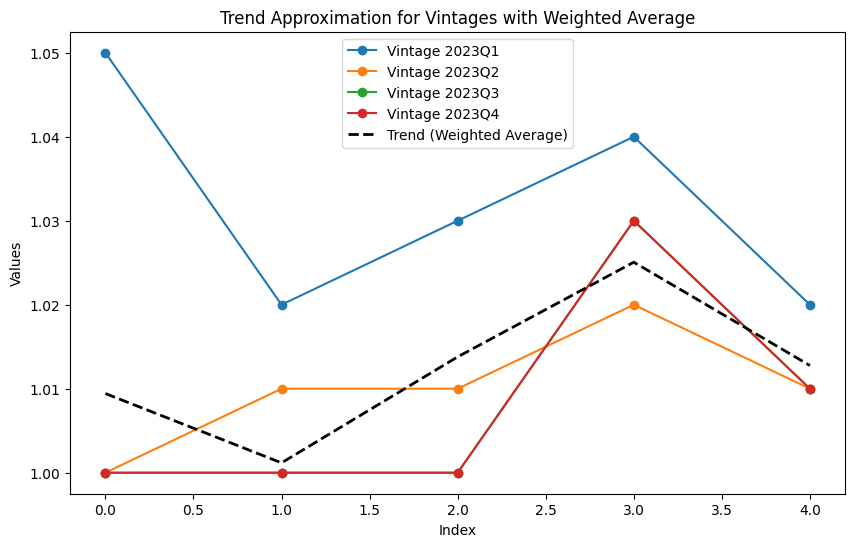

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create the DataFrame (you can replace this with your actual DataFrame)
data = {
    '2023Q1': [1.05, 1.02, 1.03, 1.04, 1.02],
    '2023Q2': [1.00, 1.01, 1.01, 1.02, 1.01],
    '2023Q3': [1.00, 1.00, 1.00, 1.03, np.nan],
    '2023Q4': [1.00, 1.00, 1.00, np.nan, np.nan],
}

df = pd.DataFrame(data)

# Fill missing values (NaNs) by using forward fill as an example
df_filled = df.ffill(axis=1)

# Assign weights to each column based on its position (newer vintages get higher weights)
weights = np.linspace(1, 2, num=len(df.columns))  # Adjust range as needed

# Calculate the weighted average for each row
weighted_averages = np.average(df_filled, axis=1, weights=weights)

# Now, let's fit a polynomial to the weighted averages to approximate the trend
# Create an x-axis representing the index of rows (vintages)
x = np.arange(len(df))

# Reshape for polynomial fitting (x needs to be a 2D array for sklearn)
x_reshaped = x.reshape(-1, 1)

# We will fit a polynomial of degree 3 for a smooth curve
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_reshaped)

# Fit linear regression on the transformed data
model = LinearRegression()
model.fit(x_poly, weighted_averages)

# Predict the values using the polynomial model
trend = model.predict(x_poly)

# Plot the result
plt.figure(figsize=(10, 6))

# Plot the individual vintages
for i, column in enumerate(df.columns):
    plt.plot(df.index, df_filled[column], label=f'Vintage {column}', marker='o')

# Plot the weighted average trend line
plt.plot(df.index, trend, label='Trend (Weighted Average)', color='black', linewidth=2, linestyle='--')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Trend Approximation for Vintages with Weighted Average')
plt.legend()
plt.show()